In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import Counter
# svg output in plots
import tqdm as tqdm
from itertools import chain
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### Parameters

In [4]:
# Load data
df = pd.read_pickle(r"../Dataset/dataframe.pkl")
df = df[df["Time"] > 1950]

df_i = df.explode("Simplices").reset_index()
authors = df_i["Simplices"].unique()
N_a = len(authors)
print("Number of authors:", N_a)

Number of authors: 1242372


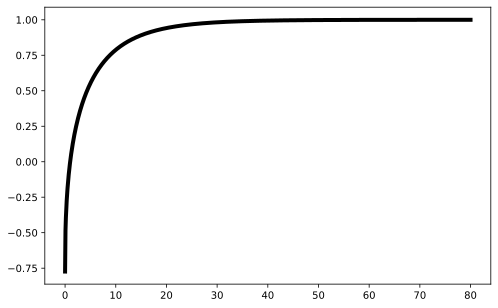

In [5]:
### Academic age distribution
from scipy.special import gammaincc
fig, ax = plt.subplots(figsize=(8, 5))
a = 0.6
b = 0.1
def pdf(x,a,b):
    norm = (b**(a-1))*gammaincc(1-a,b)
    return (1/norm)*np.exp(-b*x)*x**(-a)

def cdf(x,a,b):
    norm = gammaincc(1-a,b)
    return (1/norm)*(gammaincc(1-a,b) - gammaincc(1-a,b*x))

x_life = np.linspace(0,80,1001)
f_life = cdf(x_life,a,b)
x_life[1000] = 80
f_life[1000] = 1
plt.plot(x_life,f_life,color="black",linestyle="-",linewidth=4)

ages = []
for i in range(len(authors)):
    i_a = np.random.rand()
    age = np.where(f_life > i_a)[0][0]
    ages.append(age)

In [13]:
t0 = 1950
tf = 2010

# Parameters
N = 25 # Maximum number of orders
r = (np.log(10**5 - 10**3))/60 # simplices x year
N_simplices = 1000 # Number of simplices at t0

ti = t0

simplices = []
time = []

def p(x):
    return 1/(1+x)

def dist_order(order,age,N):
    alpha = 0.5*(1 + np.tanh(0.5*(age-10)))
    Z = np.sum([np.exp(-alpha*o) for o in range(N)])
    e = np.exp(-alpha*order)/Z
    lam = N/2
    Pois = np.exp(-lam)*lam**(order)/np.math.factorial(order)
    return alpha*e + (1-alpha)*Pois

w_t = 0
while ti < tf:
    # Compute total rate:
    W = r*N_simplices
    
    # Compute next event time
    At = - np.log(np.random.rand())/W

    ti = ti + At
    w_t = w_t + At

    # Choose main author according to the age
    i_a = np.random.randint(0,N_a)
    while np.random.rand() > p(ages[i_a]):
        i_a = np.random.randint(0,N_a)
    
    # i_a is the main author
    age = ages[i_a]
    o_i = np.random.choice(range(N),p=[dist_order(order,age,N) for order in range(N)]/np.sum([dist_order(order,age,N) for order in range(N)]))
    
    if o_i > 0:
        possible_collaborators_index = [i for i in range(N_a) if i != i_a]
        # random choice from authors to select the collaborators
        i_c = np.random.randint(0,N_a-1,o_i)
        collaborators = [authors[i] for i in i_c]
        simplices.append([authors[i_a]] + collaborators)
        time.append(ti)
    else:
        simplices.append([authors[i_a]])
        time.append(ti)
    if w_t > 1:
        N_simplices = len(simplices)
        print(ti,N_simplices)
        w_t = 0

1951.00876865482 192
1952.0189420856416 229
1953.0746640104862 264
1954.077475013933 311
1955.0940915481958 377
1956.102350754216 454
1957.1270083986358 539
1958.1357297345517 657
1959.1403036032325 788
1960.1430840201288 936
1961.1446716572273 1110
1962.149010362304 1308
1963.1589637807829 1546
1964.1600974228502 1825
1965.1647829571448 2163
1966.1673404181197 2594
1967.171946992424 3105
1968.172690497288 3731
1969.1735796398757 4431
1970.1741240762158 5336
1971.174484352171 6300
1972.1754590372077 7473


KeyboardInterrupt: 

In [8]:
simplices

[[687902.0],
 [847603.0, 1179398.0],
 [245889.0, 905107.0],
 [858743.0, 1110356.0],
 [1179895.0],
 [1061525.0],
 [297560.0],
 [22474.0],
 [673060.0, 494364.0],
 [272280.0, 983861.0, 477008.0, 799204.0],
 [1186575.0],
 [1052688.0],
 [1022437.0, 465874.0],
 [680534.0],
 [640181.0],
 [34542.0],
 [1183231.0, 42684.0, 1102479.0, 1115449.0, 665797.0, 4503.0, 1164918.0],
 [223696.0],
 [502930.0],
 [1248027.0, 920949.0, 1139233.0],
 [111740.0],
 [287381.0, 293050.0, 31566.0, 1136207.0],
 [295998.0],
 [574179.0],
 [19251.0, 1132403.0, 234412.0, 1008816.0, 559977.0],
 [260852.0],
 [1102269.0],
 [37152.0, 1211933.0, 1023112.0],
 [1201256.0],
 [1256794.0],
 [381051.0],
 [1227350.0],
 [482264.0],
 [71664.0, 1075452.0, 167075.0],
 [757729.0],
 [192535.0],
 [489847.0],
 [707338.0, 1124907.0],
 [682799.0],
 [652539.0, 567084.0, 724464.0, 222325.0],
 [407840.0, 463633.0, 106388.0, 121724.0, 513957.0, 419973.0],
 [603235.0],
 [1155080.0],
 [1069318.0, 32983.0, 172549.0],
 [714331.0, 442389.0, 366656.0],